In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
data = pd.read_csv("C:/Users/laksh/Desktop/NeuralNetwork/digit-recognizer/train.csv")

In [32]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_val = data[0:1000].T 
Y_dev = data_val[0]
X_dev = data_val[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
#X_train = data_train[1:785]
X_train = data_train[1:n]

In [34]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10,10) -0.5
    b2 = np.random.rand(10,1) -0.5
    return W1,b1,W2,b2

def leaky_relu(Z):
    return np.where(Z>0, Z, 0.01*Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))  # for stability
    return expZ / expZ.sum(axis=0)




#def SoftMax(Z):
    #return np.exp(Z) / sum(np.exp(Z))

def fwd_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) +b1
    A1 = leaky_relu(Z1)
    Z2 = W2.dot(A1) +b2
    A2 = softmax(Z2) #SoftMax(A1)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y




#def one_hot(Y):
    #one_hot_Y = np.zeros((10, Y.size))
    #one_hot_Y[Y, np.arange(Y.size)] = 1
    ##one_hot_Y= one_hot_Y.T
    #return one_hot_Y

def deriv_ReLu(Z):
    return Z > 0



def bck_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/  m * dZ2.dot(A1.T)
    db2 = 1/ m * np.sum(dZ2 , axis=1,keepdims=True)
    dZ1 = W2.T.dot(dZ2) + deriv_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1,db1,dW2,db2 

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2







In [35]:
def cross_entropy_loss(A2, Y):
    m = Y.shape[0]
    one_hot_Y = one_hot(Y)
    # Clip A2 to prevent log(0)
    A2 = np.clip(A2, 1e-12, 1.0)
    loss = -np.sum(one_hot_Y * np.log(A2)) / m
    return loss


In [36]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = fwd_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = bck_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1, db1, dW2, db2,alpha)
        if i % 10 ==0:
            print(f"Iteration {i}: Loss = {cross_entropy_loss(A2, Y)}")#print("Iteration:",i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions,Y))
    return W1, b1, W2, b2



In [37]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train, 100, 0.001)

Iteration 0: Loss = 24.31216071231749
[8 9 8 ... 9 1 9] [1 9 8 ... 3 5 0]
Accuracy: 0.11646341463414635
Iteration 10: Loss = 8.663150466204051
[3 6 3 ... 3 0 3] [1 9 8 ... 3 5 0]
Accuracy: 0.3218780487804878
Iteration 20: Loss = 5.361170612611473
[1 6 3 ... 3 0 0] [1 9 8 ... 3 5 0]
Accuracy: 0.4595609756097561
Iteration 30: Loss = 3.6192889251326816
[1 4 3 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.5433414634146342
Iteration 40: Loss = 2.5443773243676877
[1 5 4 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.5977560975609756
Iteration 50: Loss = 1.8938530485253933
[1 5 8 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.6391707317073171
Iteration 60: Loss = 1.5634538790419452
[1 5 8 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.6694390243902439
Iteration 70: Loss = 1.372028024971246
[1 5 8 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.6910487804878048
Iteration 80: Loss = 1.237442130649986
[1 5 8 ... 3 5 0] [1 9 8 ... 3 5 0]
Accuracy: 0.7091219512195122
Iteration 90: Loss = 1.1369930820529928
[1 5 8 ... 3 5 0] [1

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fwd_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


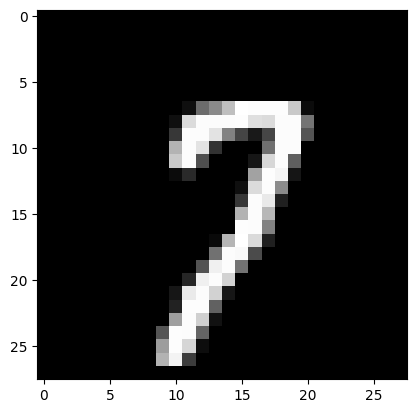

In [51]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


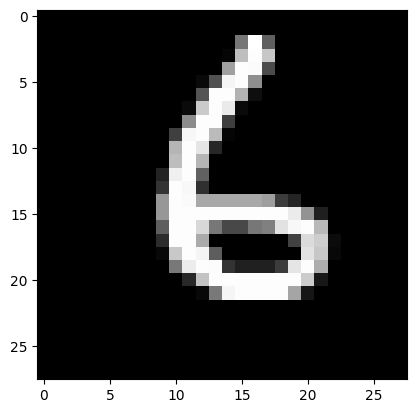

In [52]:
test_prediction(1, W1, b1, W2, b2)


Prediction:  [3]
Label:  0


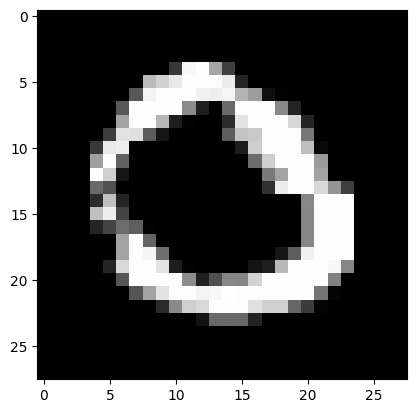

In [53]:
test_prediction(2, W1, b1, W2, b2)


Prediction:  [6]
Label:  6


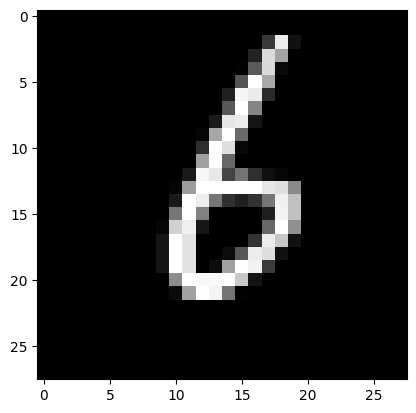

In [54]:
test_prediction(3, W1, b1, W2, b2)